# East West Airlines Clustering Assignment

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
airline = pd.read_csv('EWAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [80]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [81]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [82]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [83]:
df_airline_norm = norm_func(airline2.iloc[:,:])
df_airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [84]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airline2.iloc[:,:]))
data

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [85]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#data1 = pd.DataFrame(scaler.fit_transform(airline2.iloc[:,:]))
#data1

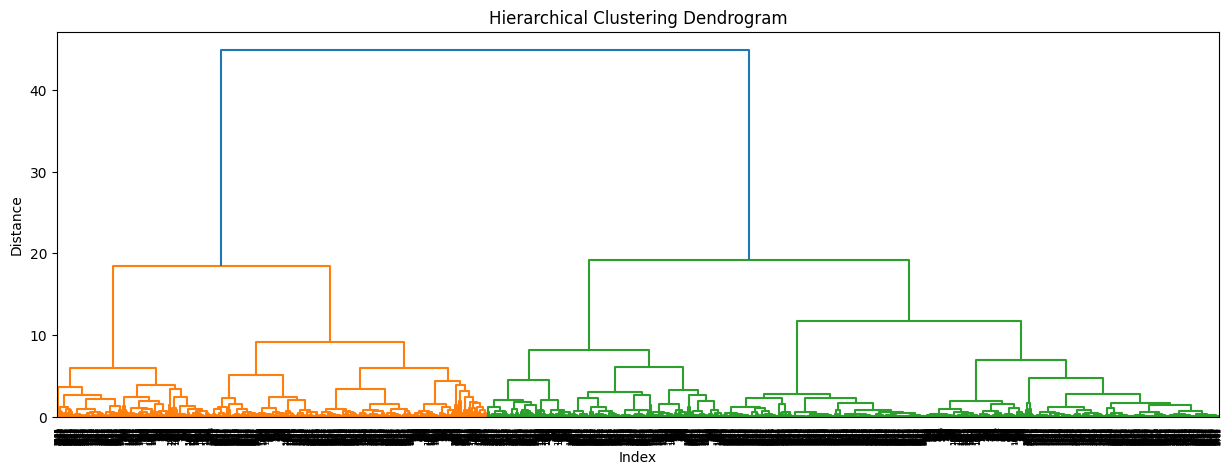

In [86]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
#p = np.array(df_norm) # converting into numpy array format
z = linkage(df_airline_norm, method="ward",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [87]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='ward',affinity = "euclidean").fit(df_airline_norm)

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline2['clust']=cluster_labels # creating a  new column and assigning it to new column
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [88]:
airline2.iloc[:,:].groupby(airline2.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


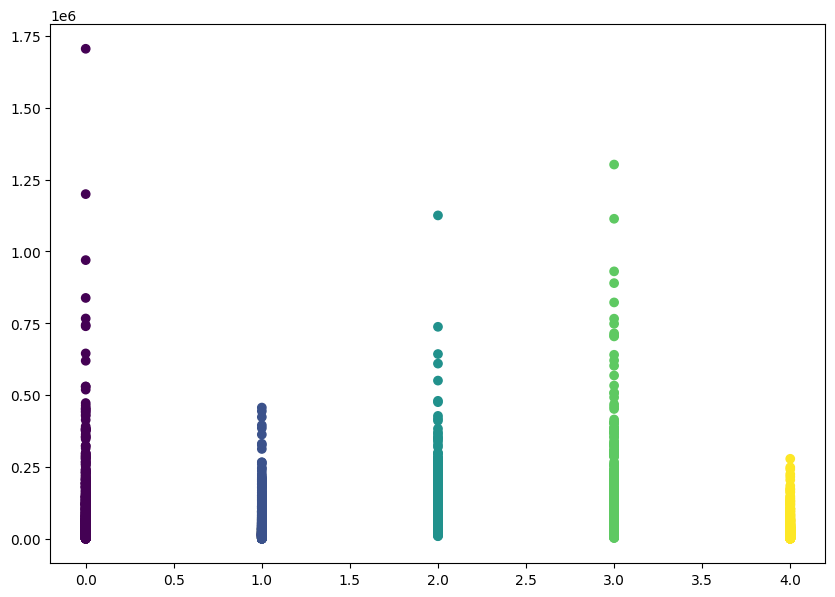

In [89]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(airline2['clust'],airline2['Balance'], c=cluster_labels)

## K mean Clustering on the same data

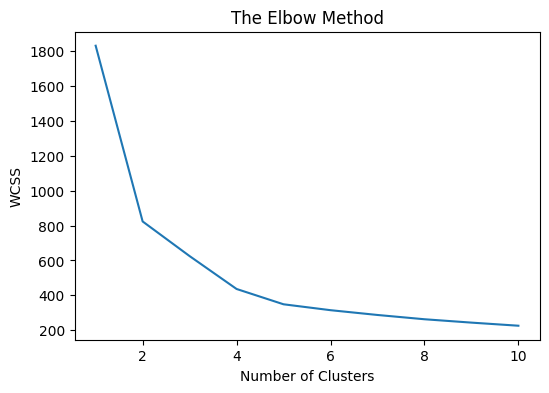

In [90]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(6, 4))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df_airline_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

### The elbow curve shows that 5 is the optimum cluster number.

In [91]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(df_airline_norm)

In [92]:
clf.labels_

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [93]:
y_kmeans

array([0, 0, 0, ..., 1, 2, 2], dtype=int32)

In [94]:
cluster_labels=pd.Series(clf.labels_)
airline2['KMeanClust']=cluster_labels # creating a  new column and assigning it to new column
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,KMeanClust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [95]:
airline2['clust'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clust, dtype: int64

In [96]:
airline2['KMeanClust'].value_counts()

2    1032
0     868
1     808
4     673
3     618
Name: KMeanClust, dtype: int64

In [97]:
airline2.groupby(['clust','KMeanClust'])['Award?'].count()

clust  KMeanClust
0      1             277
       4             669
1      0             747
       2             264
2      0             112
       2              78
       3             618
3      1             531
       4               4
4      0               9
       2             690
Name: Award?, dtype: int64

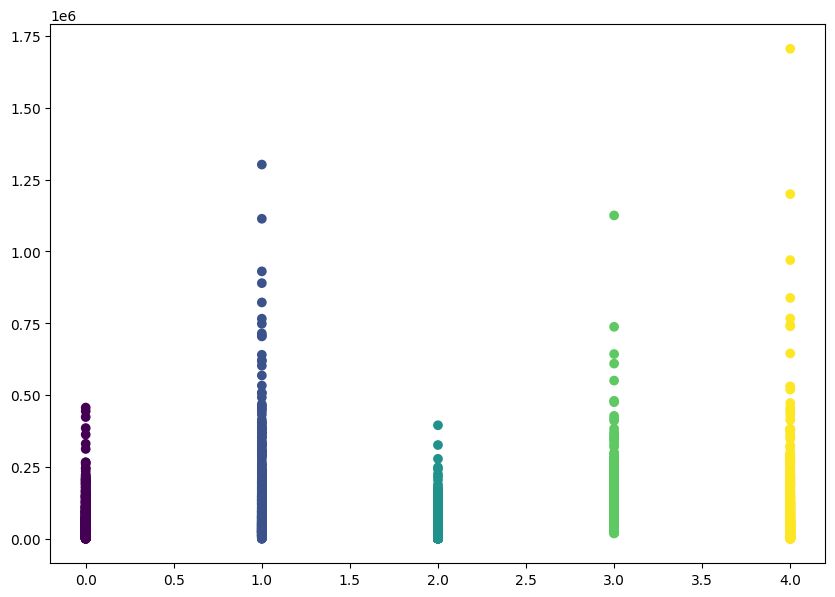

In [98]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(airline2['KMeanClust'],airline2['Balance'], c=cluster_labels)

We see a few data points which are clustered differently by both Heirarchical and KMeans clustering.
# Now lets check DBScan.

In [99]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=80)
dbscan.fit(df_airline_norm)

DBSCAN(eps=0.15, min_samples=80)

In [100]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [101]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [102]:
cl['cluster'].unique()

array([ 0, -1,  2,  1,  3,  4])

In [103]:
cluster_labels=pd.Series(dbscan.labels_)
airline2['DBScanClust']=cluster_labels # creating a  new column and assigning it to new column
airline2


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,KMeanClust,DBScanClust
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,4,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,4,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2,0


In [104]:
airline2['DBScanClust'].unique()

array([ 0, -1,  2,  1,  3,  4])

In [105]:
airline2.groupby(['clust','KMeanClust','DBScanClust'])['Award?'].count()

clust  KMeanClust  DBScanClust
0      1           -1              79
                    4             198
       4           -1             246
                    1             423
1      0           -1              27
                    0             720
       2           -1              13
                    0             251
2      0           -1             112
       2           -1              78
       3           -1             326
                    2             292
3      1           -1             338
                    3             193
       4           -1               4
4      0           -1               9
       2           -1              30
                    0             660
Name: Award?, dtype: int64

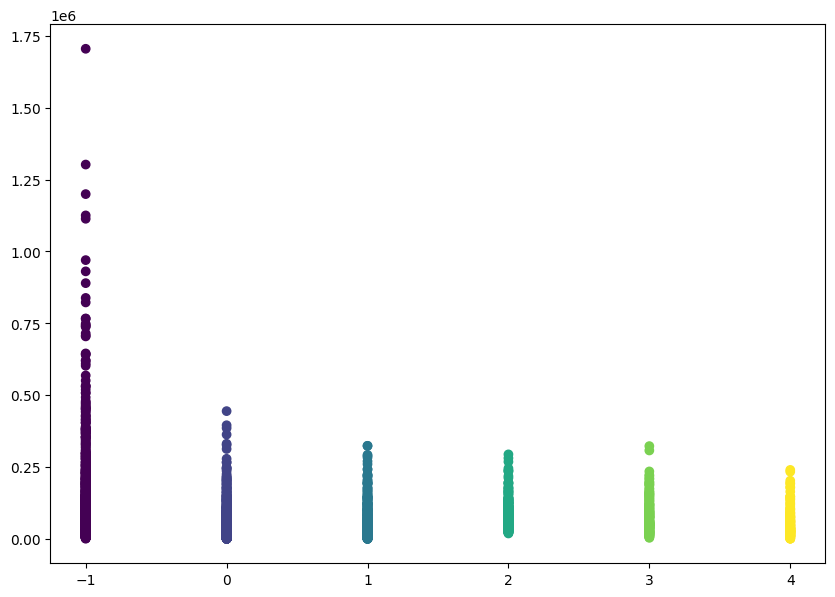

In [106]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(airline2['DBScanClust'],airline2['Balance'], c=dbscan.labels_)

The below code is to decide on the Epsilon distance. It shows how far or how close the data points are.

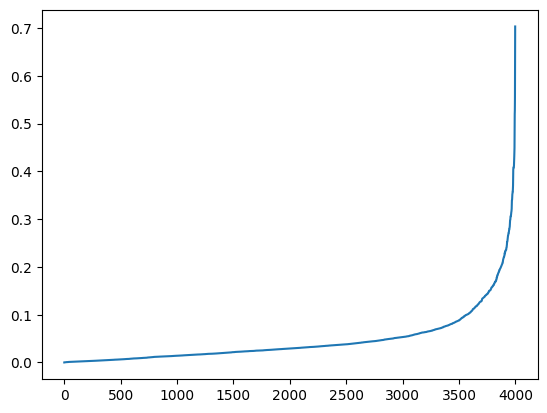

In [107]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(df_airline_norm)
distances, indices = nbrs.kneighbors(df_airline_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)